## Set up 

In [196]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn import preprocessing
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import RandomizedLasso

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression as logit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import roc_auc_score as AUC
from sklearn.model_selection import cross_val_score as CVS
from sklearn.ensemble import VotingClassifier as VC

# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

## Importing data

In [197]:
agg_c_survey_10_1_12 = pd.read_csv("data/csvs/Agg_C_Survey_10_1_12.csv")
CEO_CLT = pd.read_csv("data/csvs/CEO_CLT.csv")
C_survey_all_data = pd.read_csv("data/csvs/C_Survey_All_Data_06_23_11Revised.csv")
D_Survey_All = pd.read_csv("data/csvs/D_Survey_All_Data_06_23_11Revised.csv")
E_Survey_All = pd.read_csv("data/csvs/E Survey All Data - 06 22 11RECODED.csv")
Phoenix_CEO_Book = pd.read_csv("data/csvs/Phoenix GLOBE CEO Book 3 May 2011.csv")

In [322]:
Phoenix_CEO_Book

,uniorg,Couname,cluster,PH3COUNTRY,PH2Country,industry,org,ceocode,entrepre,commit_ind_c,...,chi_status,chi_male,chi_team2int,chi_conflict,chichar2d,chiteam2d,chinrcis2d,chiparti2d,chihum2d,auton2d
1,31001,Azerbaijan ...,...,31.0,-99.0,541.0,1.0,1.5,2.0,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31002,Azerbaijan ...,...,31.0,-99.0,443.0,2.0,1.5,2.0,4.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31003,Azerbaijan ...,...,31.0,-99.0,324.0,3.0,1.5,1.0,5.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31004,Azerbaijan ...,...,31.0,-99.0,324.0,4.0,1.5,2.0,4.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,31005,Azerbaijan ...,...,31.0,-99.0,325.0,5.0,1.5,2.0,4.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,31006,Azerbaijan ...,...,31.0,-99.0,444.0,6.0,1.5,1.0,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,31007,Azerbaijan ...,...,31.0,-99.0,524.0,7.0,1.5,2.0,6.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,31008,Azerbaijan ...,...,31.0,-99.0,233.0,8.0,1.5,1.0,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,31009,Azerbaijan ...,...,31.0,-99.0,444.0,9.0,1.5,2.0,5.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,31010,Azerbaijan ...,...,31.0,-99.0,514.0,10.0,1.5,1.0,5.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Data

In [224]:
# Based on the item composition guide, selecting the columns that are useful to us.
CSurveyCleaned = C_survey_all_data[['Couname', 'org', 'uniorg', 
                   'ceocode', 'entrepre', 'promoted', 'link', 'C1', 'C23', 
                   'C20', 'C31', 'C35','C65', 'C80', 'C9', 'C81', 'C74', 
                   'C17', 'C25', 'C52', 'C56', 'C78', 'C79', 'C29', 
                   'C73', 'C76', 'C32', 'C37', 'C49', 'C72', 'C83', 
                   'C45', 'C50', 'C53', 'C66', 'C69', 'C71', 'C21', 
                   'C54', 'C11', 'C12', 'C30', 'C58', 'C75', 'C48', 
                   'C46', 'C51', 'C4', 'C39', 'C5', 'C8', 'C34', 'C44', 
                   'C77', 'C42', 'C61', 'C36', 'C41', 'C43', 'C82', 'C6', 
                   'C60', 'C10', 'C15', 'C40', 'C28', 'C27', 'C33', 'C59', 
                   'C16', 'C19', 'C26', 'C64', 'C67', 'C88', 'C90', 'C94', 
                   'C87', 'C95', 'C96', 'C86', 'C89', 'C92', 'C93', 'C1', 'C22', 
                   'C14', 'C55', 'C2', 'C68', 'C84', 'C85']].fillna(CSurveyCleaned.mean())

DSurveyCleaned = D_Survey_All[['couname', 'org', 'uniorg', 'ceocode', 'link', 
                              'entrepre', 'promoted', 'D21', 'D39', 'D50', 
                              'D85', 'D53', 'D55', 'D69', 'D70', 'D71', 
                              'D8', 'D26', 'D27', 'D67', 'D44', 'D45', 'D46', 'D24', 
                              'D9', 'D42', 'D78', 'D28', 'D60', 'D84', 'D30', 
                              'D38', 'D49', 'D66', 'D14', 'D3', 'D4', 'D18', 'D74', 
                              'D12', 'D1', 'D6', 'D11', 'D5', 'D29', 'D16', 'D79', 
                              'D31', 'D10', 'D59', 'D22', 'D41', 'D48', 'D33', 'D72', 
                              'D54', 'D58', 'D15', 'D25', 'D61', 'D2', 'D89', 'D91', 'D95', 
                              'D88', 'D87', 'D96', 'D97', 'D90', 'D93', 'D94', 'D47', 'D63', 
                              'D52', 'D62', 'D57', 'D75', 'D77', 'D43', 'D76', 'D23', 'D36', 
                              'D73', 'D64', 'D65', 'D68', 'D80', 'D51', 'D86', 'D35', 'D82', 
                              'D56']].fillna(DSurveyCleaned.mean())

DSurveyCleaned.head()

,couname,org,uniorg,ceocode,link,entrepre,promoted,D21,D39,D50,...,D73,D64,D65,D68,D80,D51,D86,D35,D82,D56
1,Azerbaijan ...,1,31001,1,310011,2.0,1.0,4.0,1.0,3.0,...,6.0,6.0,6.0,6.0,5.0,4.0,5.0,6.0,6.0,6.0
2,Azerbaijan ...,1,31001,2,310012,2.0,1.0,3.0,1.0,2.0,...,5.0,6.0,6.0,6.0,6.0,5.0,4.0,5.0,5.0,5.0
3,Azerbaijan ...,2,31002,1,310021,2.0,1.0,2.0,2.0,2.0,...,6.0,5.0,5.0,5.0,6.0,4.0,4.0,5.0,5.0,5.0
4,Azerbaijan ...,2,31002,2,310022,2.0,1.0,3.0,1.0,3.0,...,6.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,6.0,5.0
5,Azerbaijan ...,3,31003,1,310031,1.0,1.0,3.0,3.0,3.0,...,4.0,5.0,6.0,7.0,6.0,1.0,3.0,6.0,3.0,5.0


## Beginning some analysis stuffs.

In [227]:
# Grouping by country, what do we have here?
C_Grouped_Country_Avg = CSurveyCleaned[['Couname', 'C1', 'C23', 
                   'C20', 'C31', 'C35', 'C65', 'C80', 'C9', 'C81', 'C74', 
                   'C17', 'C25', 'C52', 'C56', 'C78', 'C79', 'C29', 
                   'C73', 'C76', 'C32', 'C37', 'C49', 'C72', 'C83', 
                   'C45', 'C50', 'C53', 'C66', 'C69', 'C71', 'C21', 
                   'C54', 'C11', 'C12', 'C30', 'C58', 'C75', 'C48', 
                   'C46', 'C51', 'C4', 'C39', 'C5', 'C8', 'C34', 'C44', 
                   'C77', 'C42', 'C61', 'C36', 'C41', 'C43', 'C82', 'C6', 
                   'C60', 'C10', 'C15', 'C40', 'C28', 'C27', 'C33', 'C59', 
                   'C16', 'C19', 'C26', 'C64', 'C67', 'C88', 'C90', 'C94', 
                   'C87', 'C95', 'C96', 'C86', 'C89', 'C92', 'C93', 'C1', 'C22', 
                   'C14', 'C55', 'C2', 'C68', 'C84', 'C85']].groupby("Couname").mean()
D_Grouped_Country_Avg = DSurveyCleaned[['couname', 'D21', 'D39', 'D50', 
                              'D85', 'D53', 'D55', 'D69', 'D70', 'D71', 
                              'D8', 'D26', 'D27', 'D67', 'D44', 'D45', 'D46', 'D24', 
                              'D9', 'D42', 'D78', 'D28', 'D60', 'D84', 'D30', 
                              'D38', 'D49', 'D66', 'D14', 'D3', 'D4', 'D18', 'D74', 
                              'D12', 'D1', 'D6', 'D11', 'D5', 'D29', 'D16', 'D79', 
                              'D31', 'D10', 'D59', 'D22', 'D41', 'D48', 'D33', 'D72', 
                              'D54', 'D58', 'D15', 'D25', 'D61', 'D2', 'D89', 'D91', 'D95', 
                              'D88', 'D87', 'D96', 'D97', 'D90', 'D93', 'D94', 'D47', 'D63', 
                              'D52', 'D62', 'D57', 'D75', 'D77', 'D43', 'D76', 'D23', 'D36', 
                              'D73', 'D64', 'D65', 'D68', 'D80', 'D51', 'D86', 'D35', 'D82', 
                              'D56']].groupby("couname").mean()

In [228]:
C_Grouped_Country_Avg.head()

,C1,C1,C23,C20,C31,C35,C65,C80,C9,C81,...,C93,C1,C1,C22,C14,C55,C2,C68,C84,C85
Couname,,,,,,,,,,,,,,,,,,,,,
Austria,6.253012,6.253012,3.132530,2.168675,3.265060,3.289157,3.060241,2.867470,5.253012,5.024096,...,5.939759,6.253012,6.253012,5.277108,3.829268,3.060976,6.132530,5.722892,4.670732,5.674699
Azerbaijan,4.875000,4.875000,4.000000,4.975000,5.437500,4.700000,5.250000,5.175000,5.237500,4.362500,...,5.100000,4.875000,4.875000,4.375000,5.862500,5.900000,5.137500,5.062500,5.425000,4.512500
Brazil,5.775281,5.775281,3.693182,3.831461,4.613636,3.730337,4.337079,4.011236,4.931034,4.573034,...,5.897727,5.775281,5.775281,5.584270,4.735632,4.820225,5.931818,5.454545,5.517647,5.372093
China,5.914286,5.914286,3.362903,5.461224,3.361446,3.522088,3.947368,4.611336,5.724696,4.653226,...,5.873984,5.914286,5.914286,5.612245,5.453441,5.471774,5.955645,5.584677,5.126016,5.677419
Estonia,5.879630,5.879630,3.179245,2.351852,3.685185,3.132075,3.305556,4.654206,4.897196,4.842593,...,5.400000,5.879630,5.879630,5.194444,4.629630,4.212963,5.759259,5.214953,4.925234,5.740741


In [229]:
D_Grouped_Country_Avg.head()

,D21,D39,D50,D85,D53,D55,D69,D70,D71,D8,...,D73,D64,D65,D68,D80,D51,D86,D35,D82,D56
couname,,,,,,,,,,,,,,,,,,,,,
Austria,2.853199,2.052307,2.692321,3.794027,5.814969,5.434866,5.187384,4.731004,5.187251,4.695833,...,4.652078,5.911531,5.684210,5.099432,5.534748,4.831773,5.211066,3.956209,3.133376,4.206786
Azerbaijan,4.600000,4.200000,3.675000,4.425000,4.375000,3.937500,4.350174,5.087500,5.262500,4.537500,...,5.575000,5.187500,5.162500,5.062500,5.625000,4.437500,4.775000,5.475000,5.050000,5.437500
Brazil,3.392388,1.795861,2.534848,3.582996,5.616760,5.564071,5.345470,5.341344,5.678307,4.619562,...,5.171488,5.515549,5.603996,5.700480,5.858235,5.836713,5.582548,4.111101,3.880600,4.953424
China,3.272326,2.130308,3.075147,4.245939,5.223195,5.181292,5.417860,5.337887,5.166344,5.398331,...,5.228814,5.297972,5.486965,5.181149,5.654243,5.049346,5.466414,4.667393,4.688092,4.956379
Estonia,3.430758,2.167299,2.878511,4.336404,5.186784,5.230356,4.836678,4.758393,5.059618,5.214169,...,4.908093,5.438597,5.399189,4.980904,5.525513,4.498665,5.037189,3.912410,3.800435,4.266106


### We're going off of the Item Composition Guide referenced in the repository here. Will analyze individual categories such as autocraticity, participation, modesty, charisma (risk tolerance, convincing-ness, self-sacrificial), collectivistic, decisiveness, diplomatic, face saver, visionary, and more....

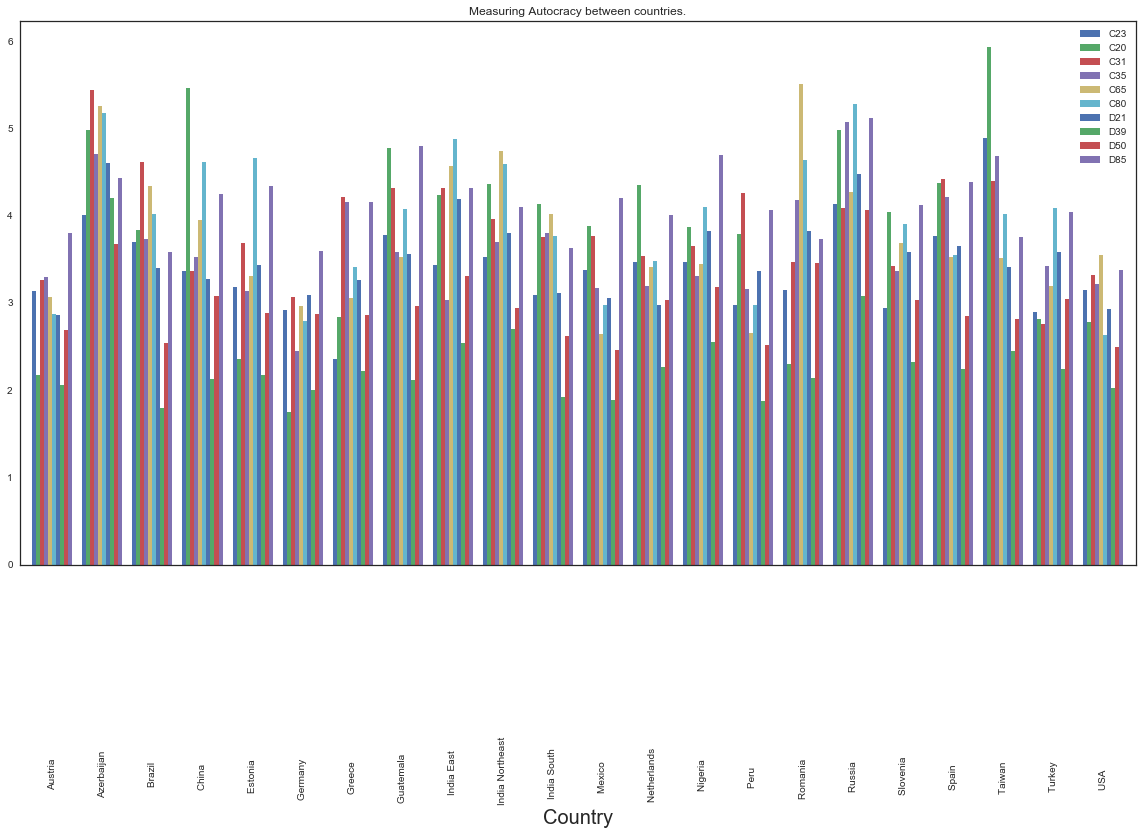

In [272]:
# Autocratic
autocratic_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C23', 'C20', 'C31', 'C35', 'C65', 'C80']]
autocratic_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D21', 'D39', 'D50', 'D85']]
autocratic_D.rename(columns={"couname":"Couname"},inplace=True)
autocrat = pd.merge(autocratic_C, autocratic_D)
autocrat.set_index("Couname", inplace=True)
autocrat.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Autocracy between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

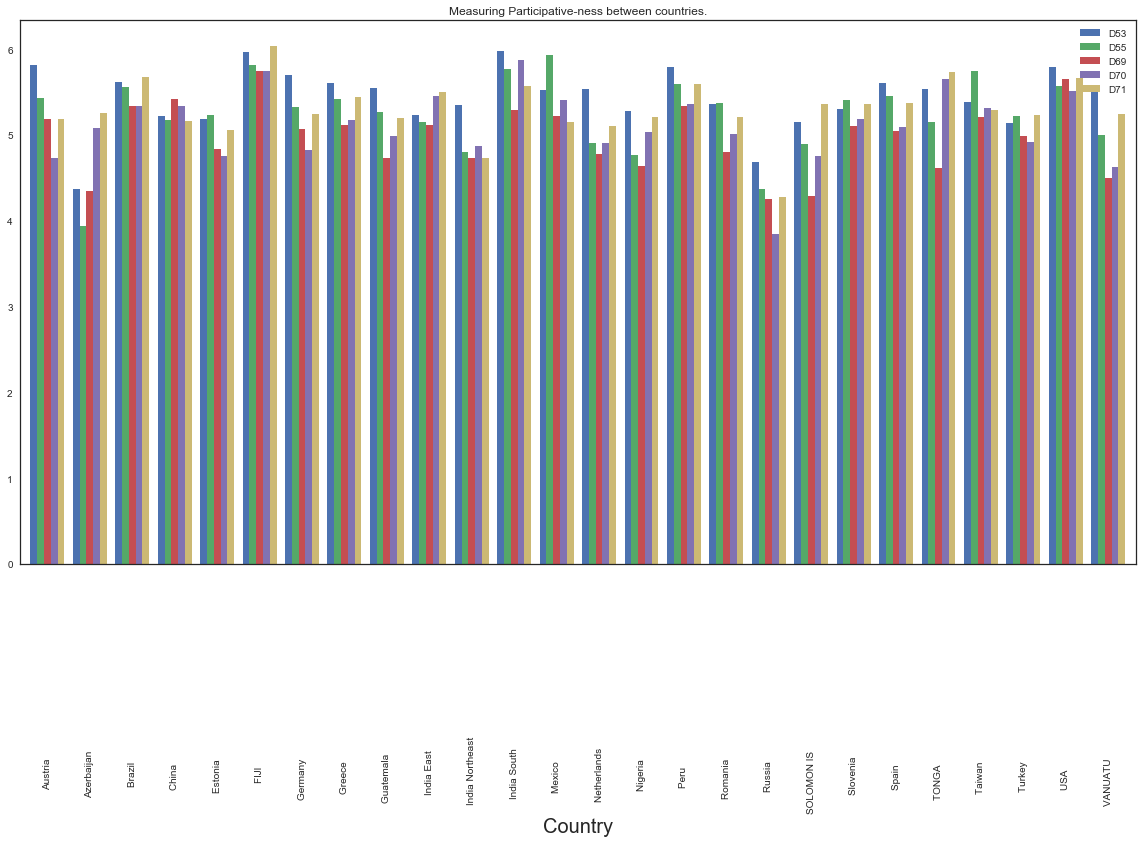

In [273]:
# Participative
Participative = D_Grouped_Country_Avg.reset_index()[['couname', 'D53', 'D55', 'D69', 'D70', 'D71']]
Participative.set_index("couname", inplace=True)
Participative.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Participative-ness between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

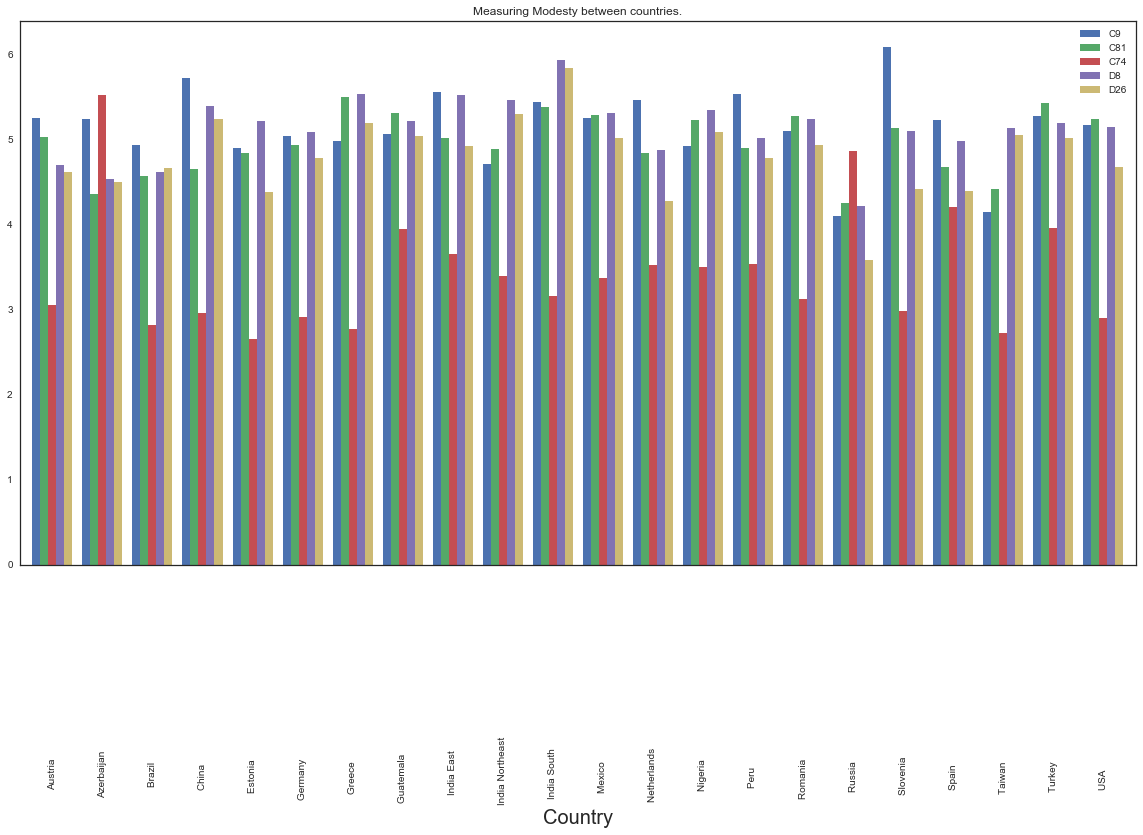

In [277]:
# Modesty
Modesty_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C9', 'C81', 'C74']]
Modesty_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D8', 'D26']]
Modesty_D.rename(columns={"couname":"Couname"},inplace=True)
Modesty = pd.merge(Modesty_C, Modesty_D)
Modesty.set_index("Couname", inplace=True)
Modesty.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Modesty between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

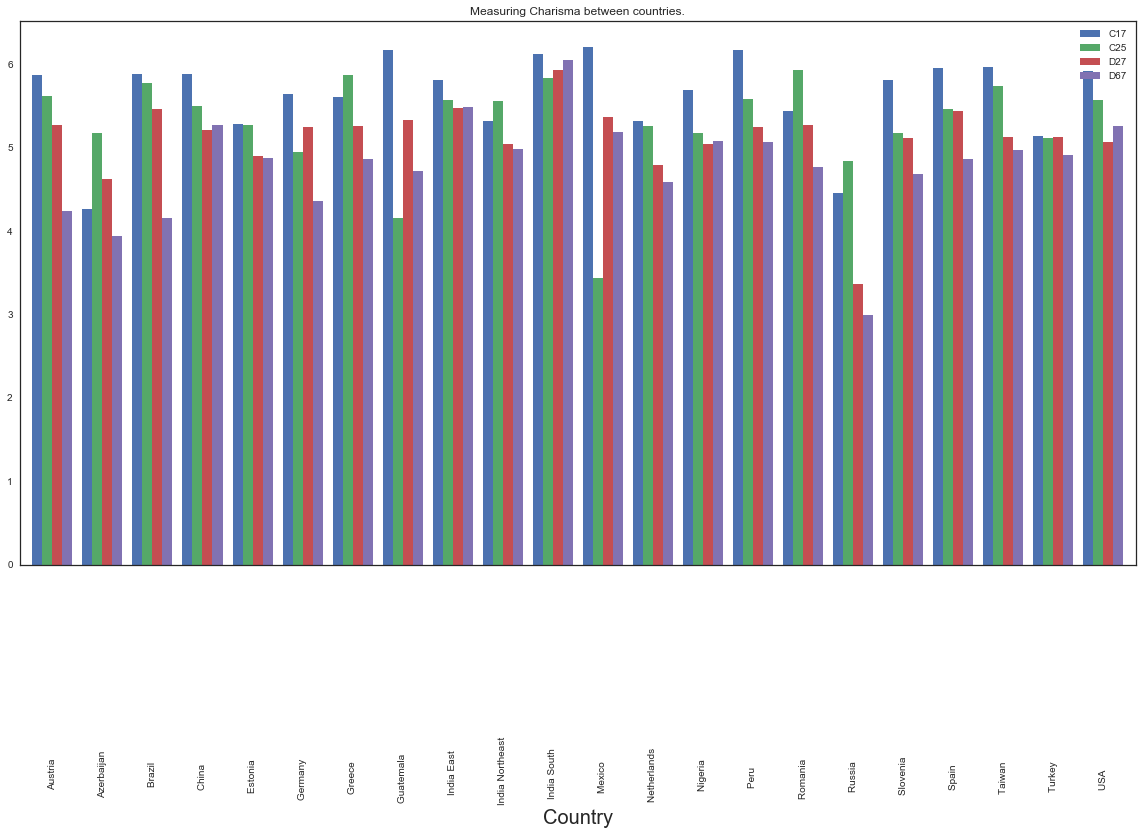

In [278]:
# Charisma
Charisma_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C17', 'C25']]
Charisma_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D27', 'D67']]
Charisma_D.rename(columns={"couname":"Couname"},inplace=True)
Charisma = pd.merge(Charisma_C, Charisma_D)
Charisma.set_index("Couname", inplace=True)
Charisma.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Charisma between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

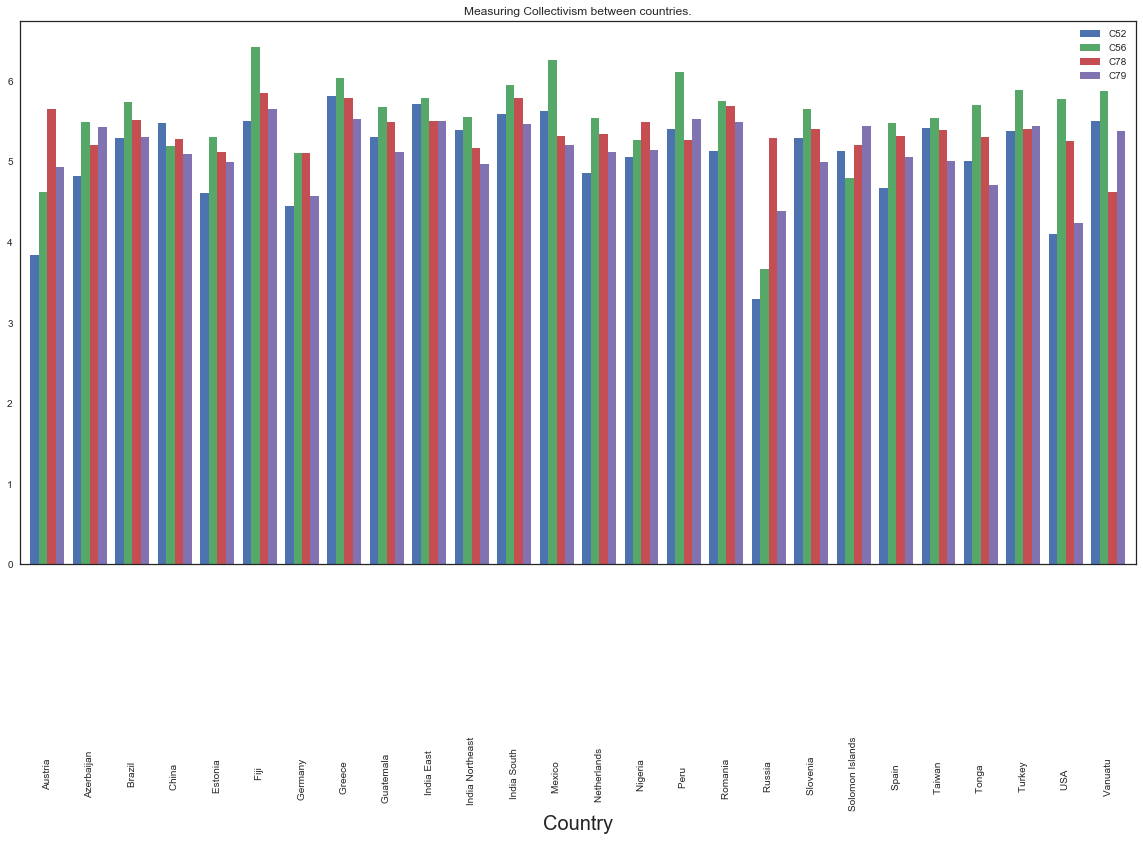

In [276]:
# Collectivism
Collectivism = C_Grouped_Country_Avg.reset_index()[['Couname', 'C52', 'C56', 'C78', 'C79']]
Collectivism.set_index("Couname", inplace=True)
Collectivism.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Collectivism between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

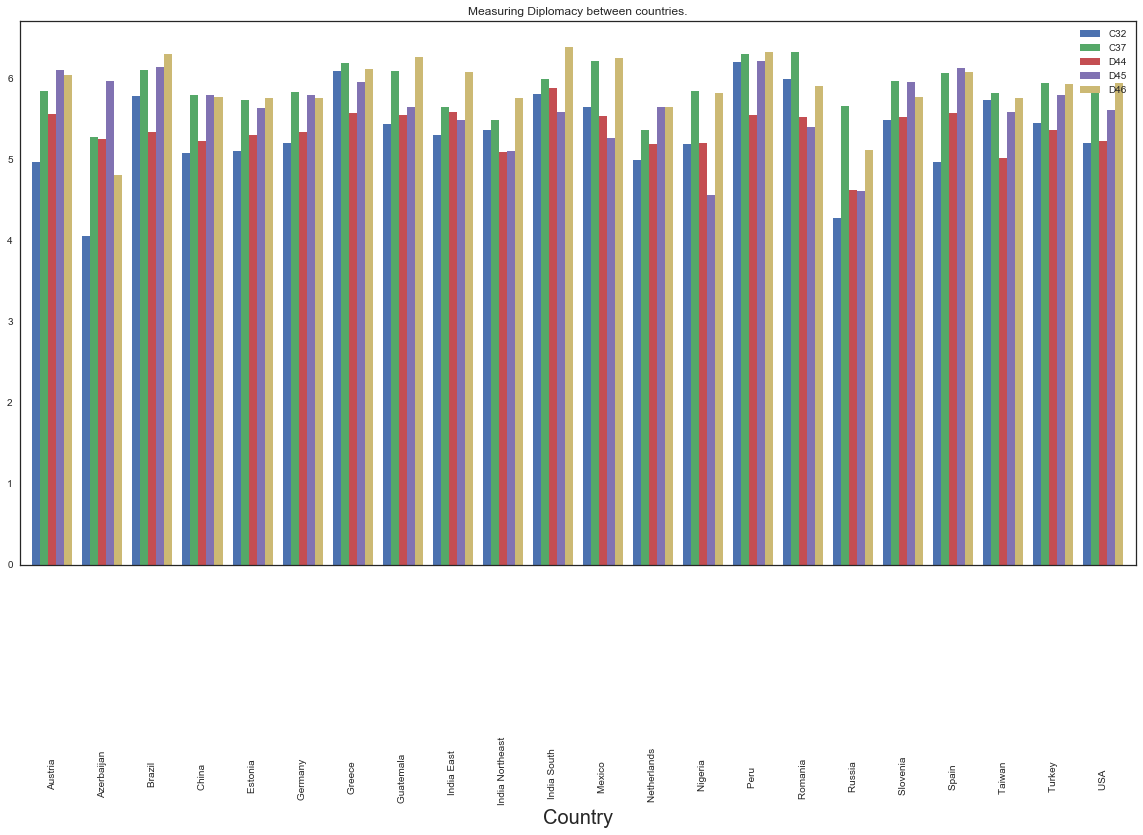

In [279]:
# Diplomacy
Diplomacy_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C32', 'C37']]
Diplomacy_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D44', 'D45', 'D46']]
Diplomacy_D.rename(columns={"couname":"Couname"},inplace=True)
Diplomacy = pd.merge(Diplomacy_C, Diplomacy_D)
Diplomacy.set_index("Couname", inplace=True)
Diplomacy.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Diplomacy between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

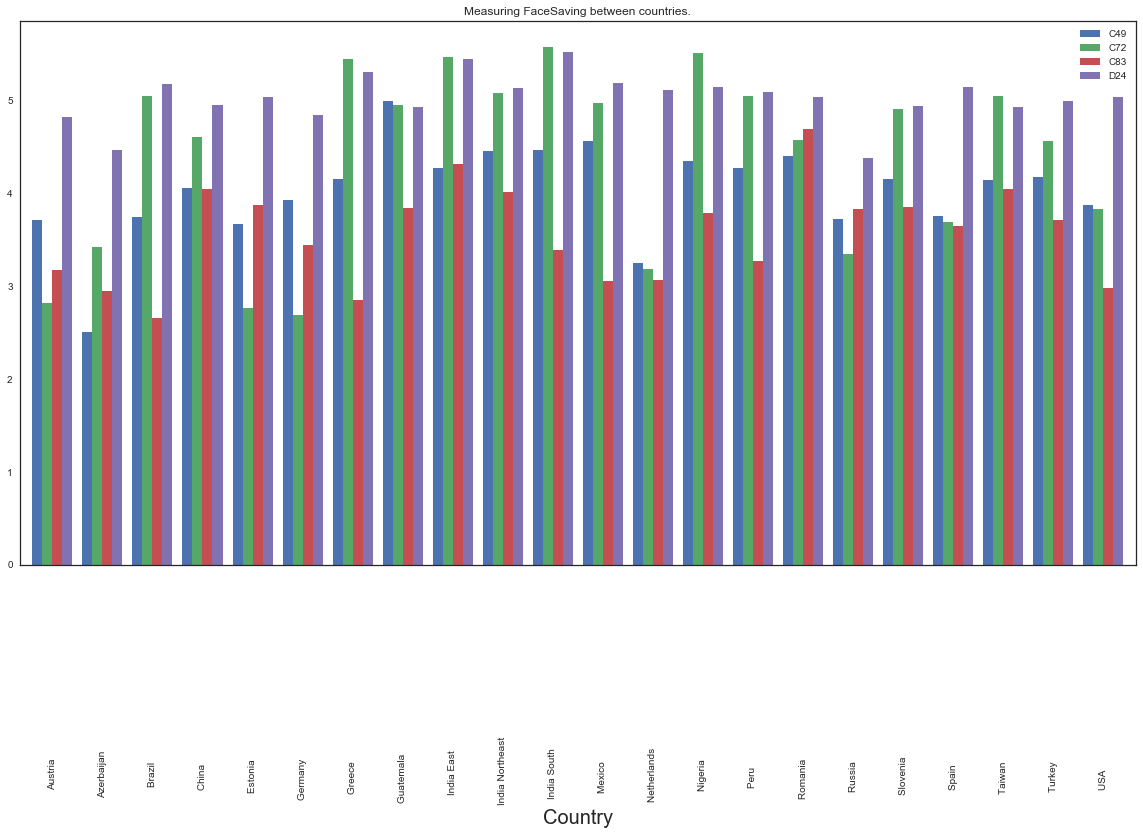

In [281]:
# "Face Saving"
FaceSaving_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C49', 'C72', 'C83']]
FaceSaving_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D24']]
FaceSaving_D.rename(columns={"couname":"Couname"},inplace=True)
FaceSaving = pd.merge(FaceSaving_C, FaceSaving_D)
FaceSaving.set_index("Couname", inplace=True)
FaceSaving.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring FaceSaving between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

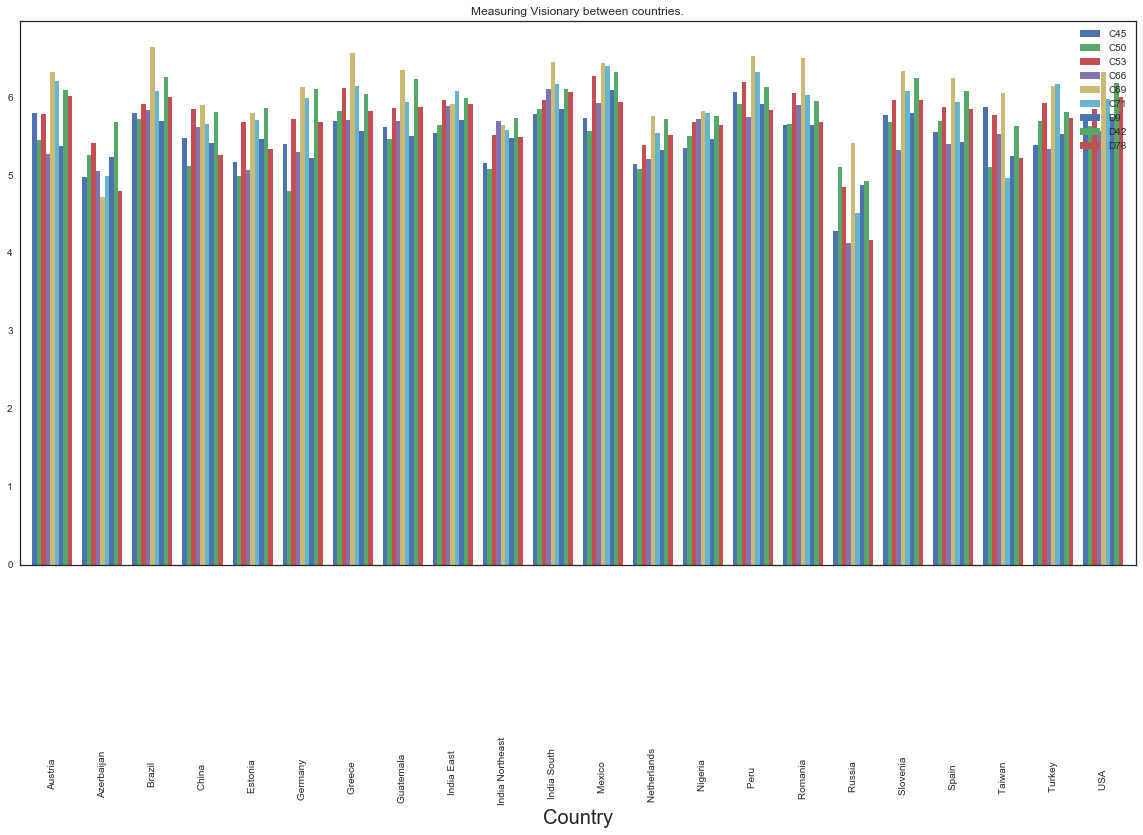

In [287]:
# "Visionary"
Visionary_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C45', 'C50', 'C53', 'C66', 'C69', 'C71']]
Visionary_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D9', 'D42', 'D78']]
Visionary_D.rename(columns={"couname":"Couname"},inplace=True)
Visionary = pd.merge(Visionary_C, Visionary_D)
Visionary.set_index("Couname", inplace=True)
Visionary.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Visionary between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

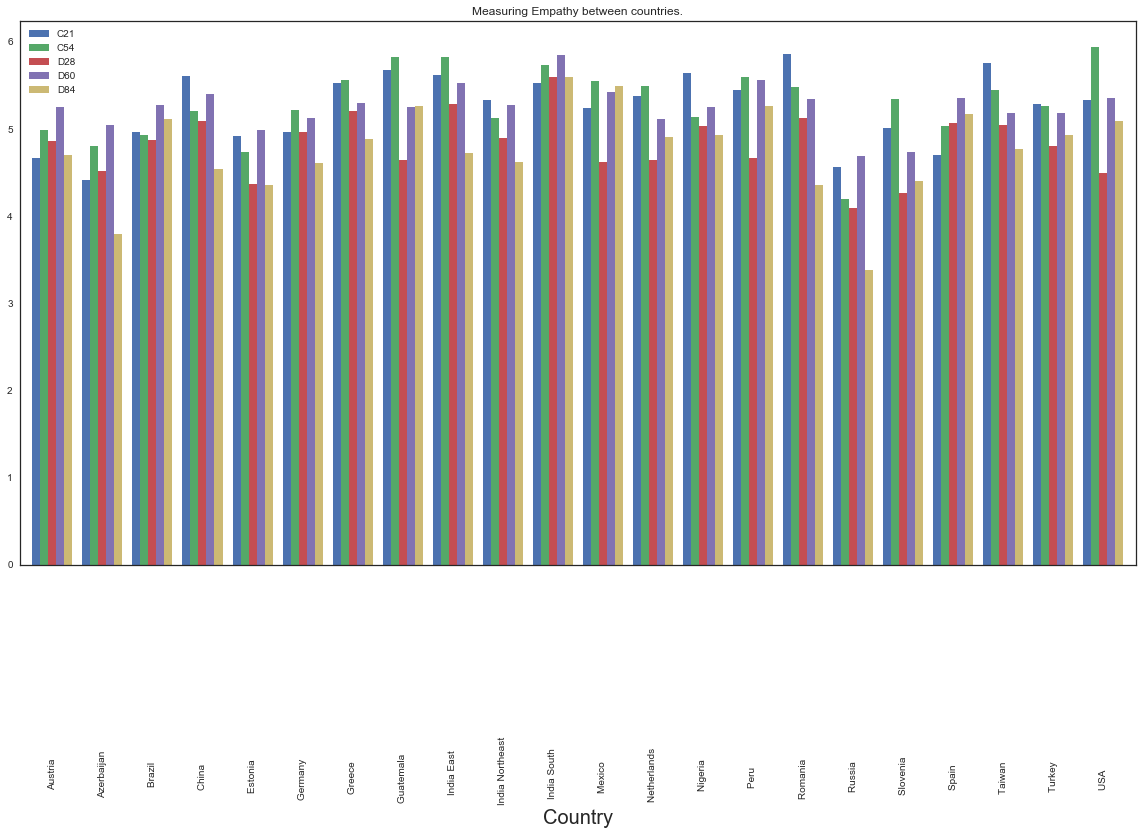

In [288]:
# Humane Orientation (Empathy)
Empathy_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C21', 'C54']]
Empathy_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D28', 'D60', 'D84']]
Empathy_D.rename(columns={"couname":"Couname"},inplace=True)
Empathy = pd.merge(Empathy_C, Empathy_D)
Empathy.set_index("Couname", inplace=True)
Empathy.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Empathy between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

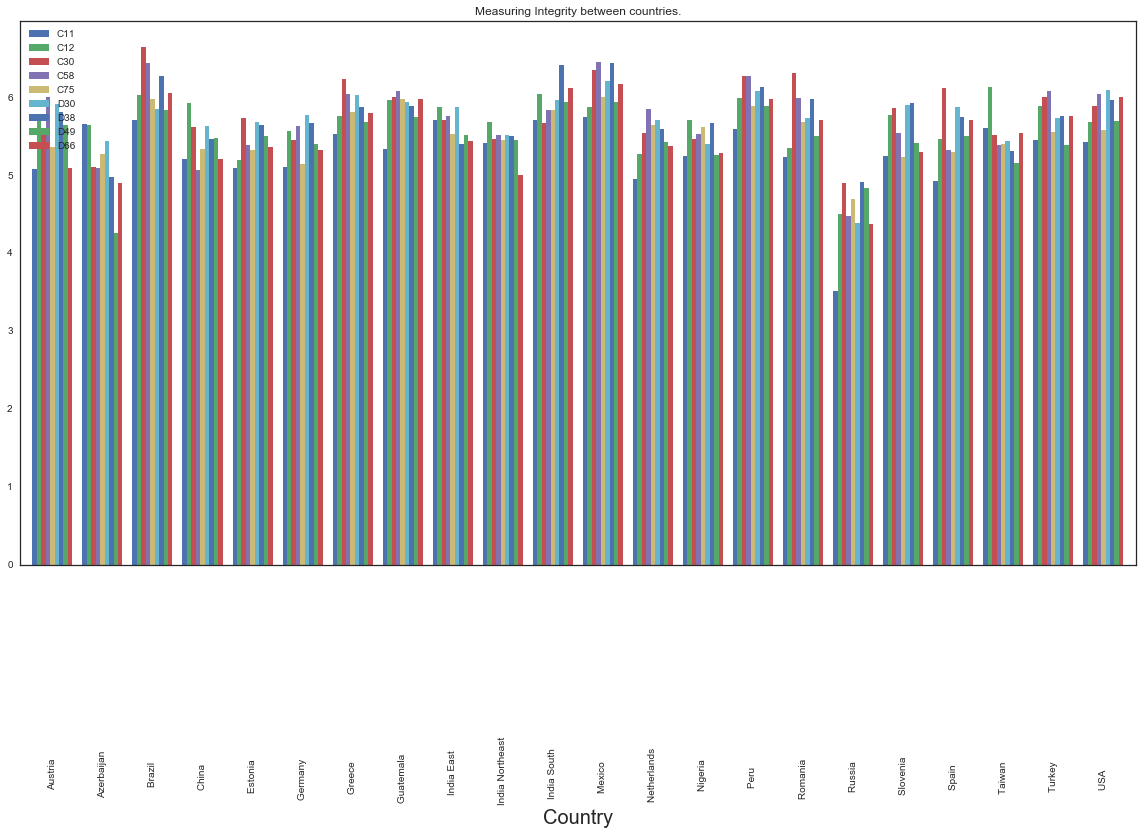

In [290]:
# Integrity
Integrity_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C11', 'C12', 'C30', 'C58', 'C75']]
Integrity_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D30', 'D38', 'D49', 'D66']]
Integrity_D.rename(columns={"couname":"Couname"},inplace=True)
Integrity = pd.merge(Integrity_C, Integrity_D)
Integrity.set_index("Couname", inplace=True)
Integrity.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Integrity between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

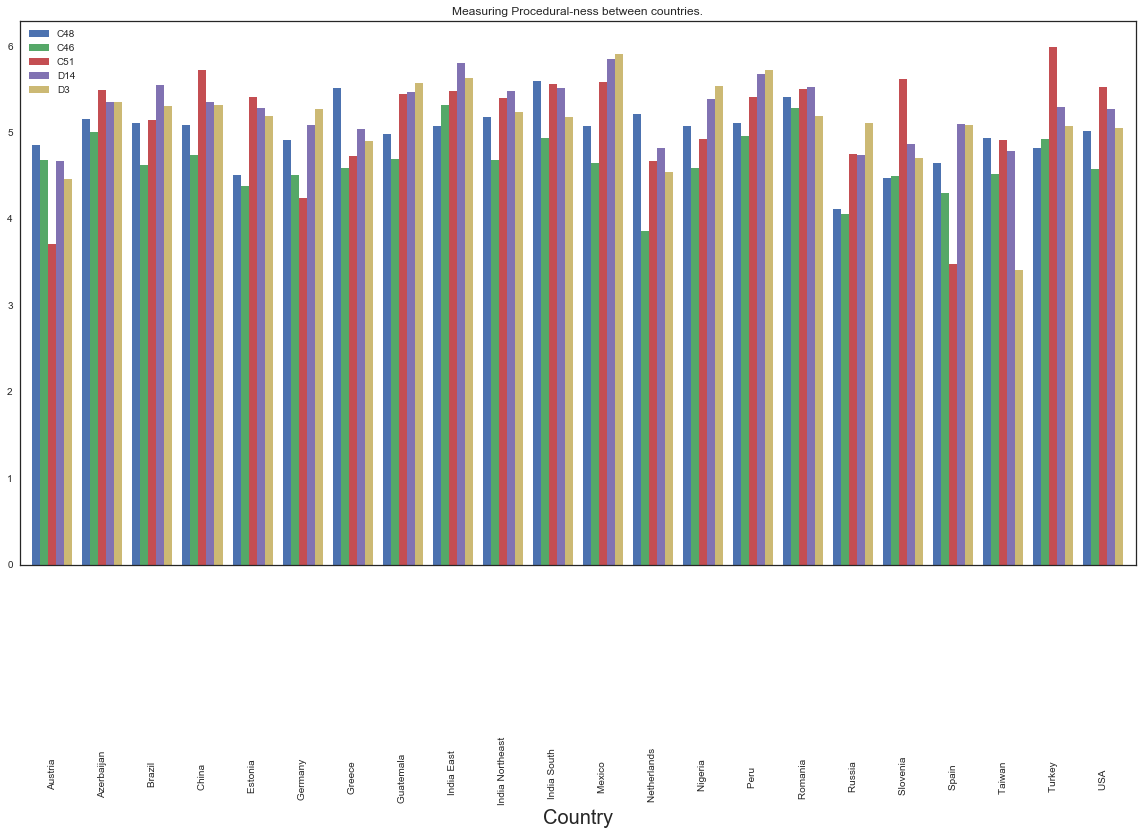

In [292]:
# Procedural
Procedural_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C48', 'C46', 'C51']]
Procedural_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D14', 'D3']]
Procedural_D.rename(columns={"couname":"Couname"},inplace=True)
Procedural = pd.merge(Procedural_C, Procedural_D)
Procedural.set_index("Couname", inplace=True)
Procedural.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Procedural-ness between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

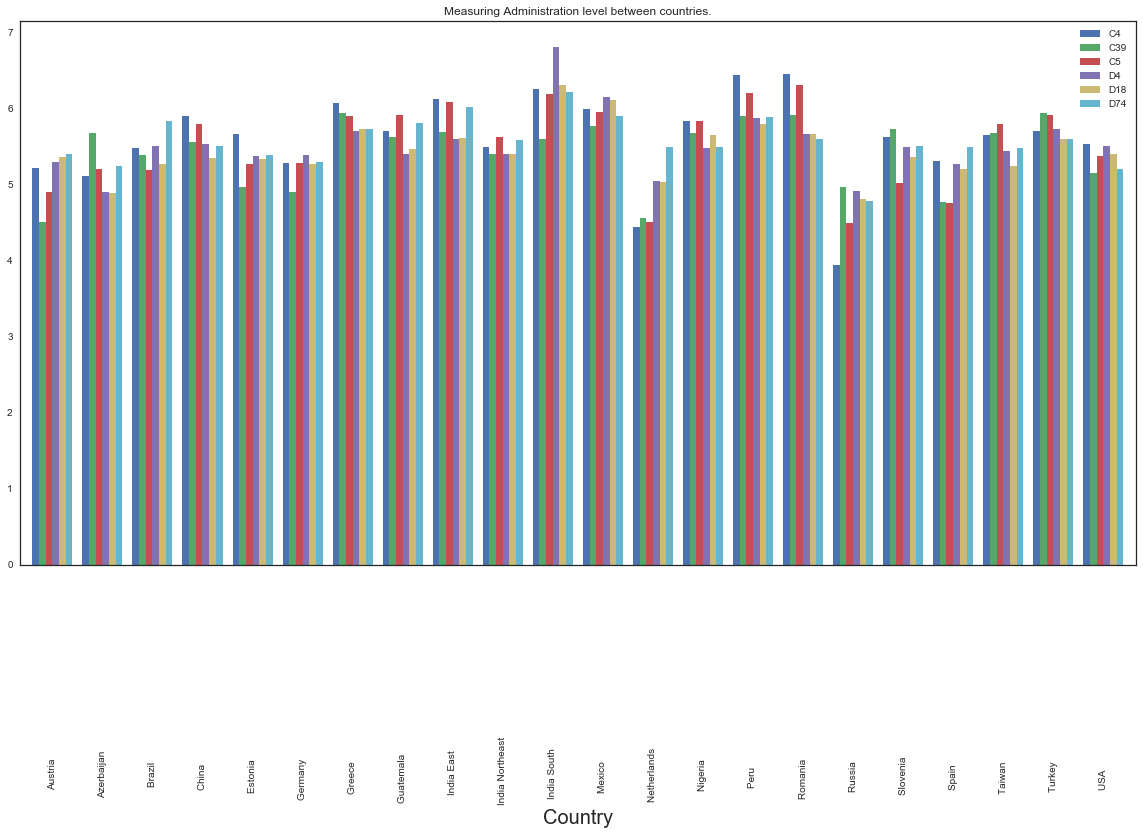

In [294]:
# Admin
Admin_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C4', 'C39', 'C5']]
Admin_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D4', 'D18', 'D74']]
Admin_D.rename(columns={"couname":"Couname"},inplace=True)0
Admin = pd.merge(Admin_C, Admin_D)
Admin.set_index("Couname", inplace=True)
Admin.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Administration level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

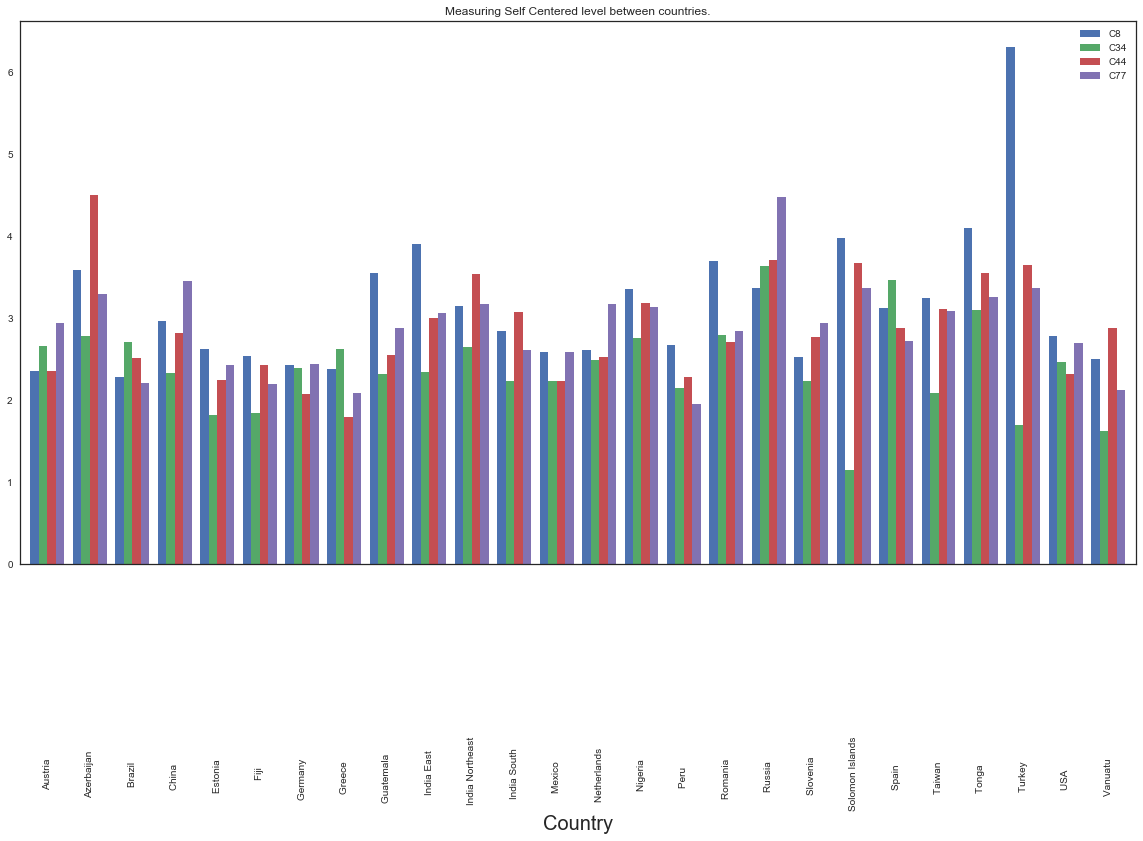

In [295]:
# SelfCentered
SelfCentered = C_Grouped_Country_Avg.reset_index()[['Couname', 'C8', 'C34', 'C44', 'C77']]
SelfCentered.set_index("Couname", inplace=True)
SelfCentered.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Self Centered level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

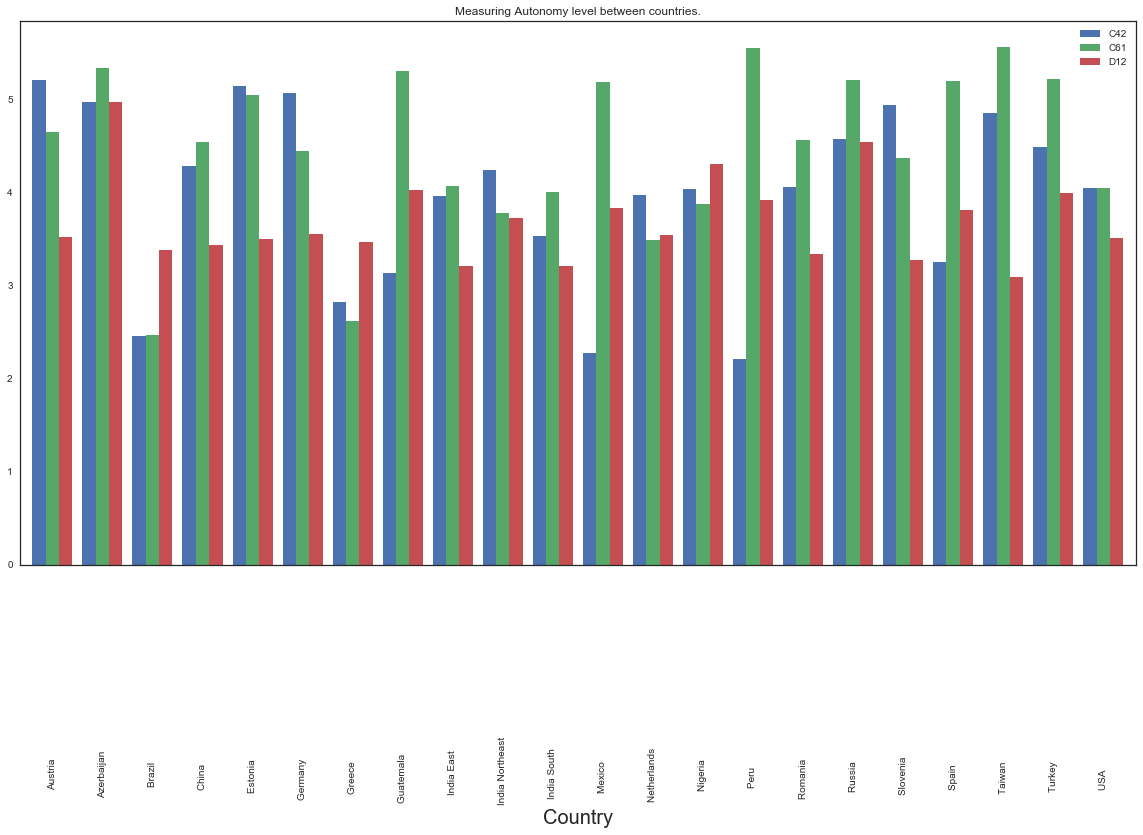

In [297]:
# Autonomy
Autonomy_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C42', 'C61']]
Autonomy_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D12']]
Autonomy_D.rename(columns={"couname":"Couname"},inplace=True)
Autonomy = pd.merge(Autonomy_C, Autonomy_D)
Autonomy.set_index("Couname", inplace=True)
Autonomy.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Autonomy level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

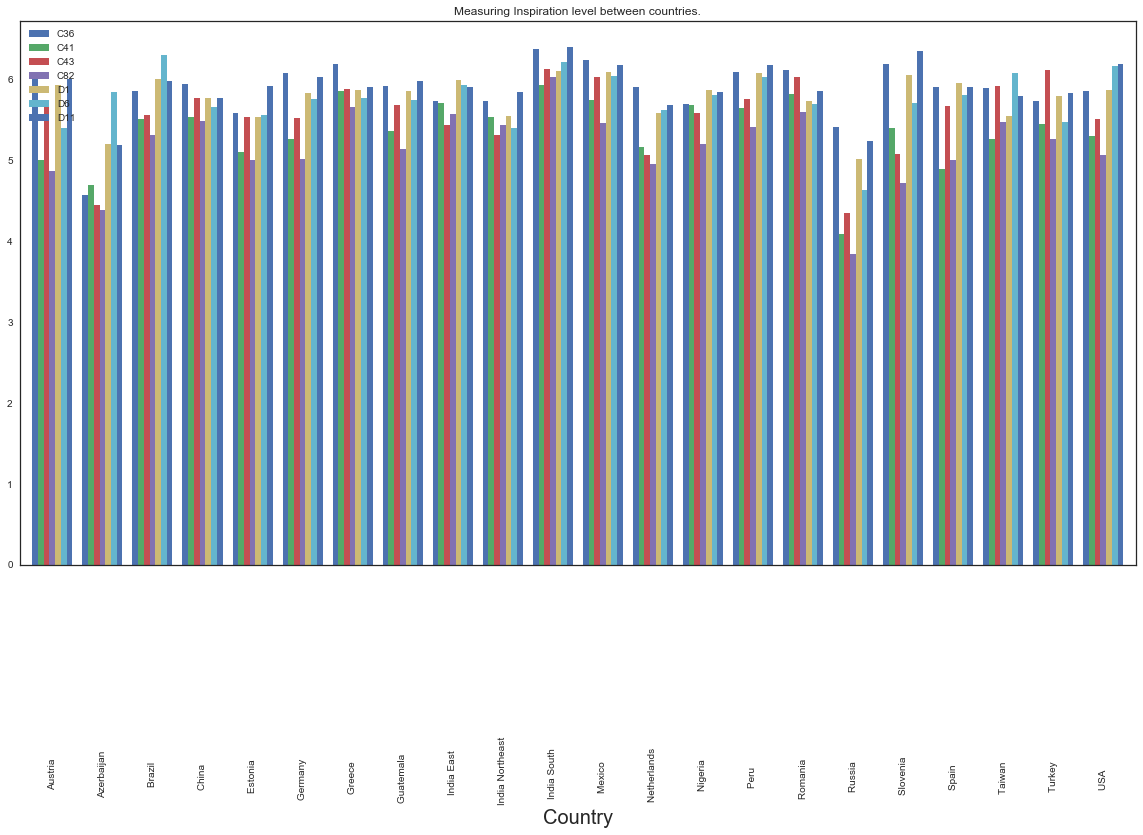

In [298]:
# Inspiration
Inspiration_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C36', 'C41', 'C43', 'C82']]
Inspiration_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D1', 'D6', 'D11']]
Inspiration_D.rename(columns={"couname":"Couname"},inplace=True)
Inspiration = pd.merge(Inspiration_C, Inspiration_D)
Inspiration.set_index("Couname", inplace=True)
Inspiration.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Inspiration level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

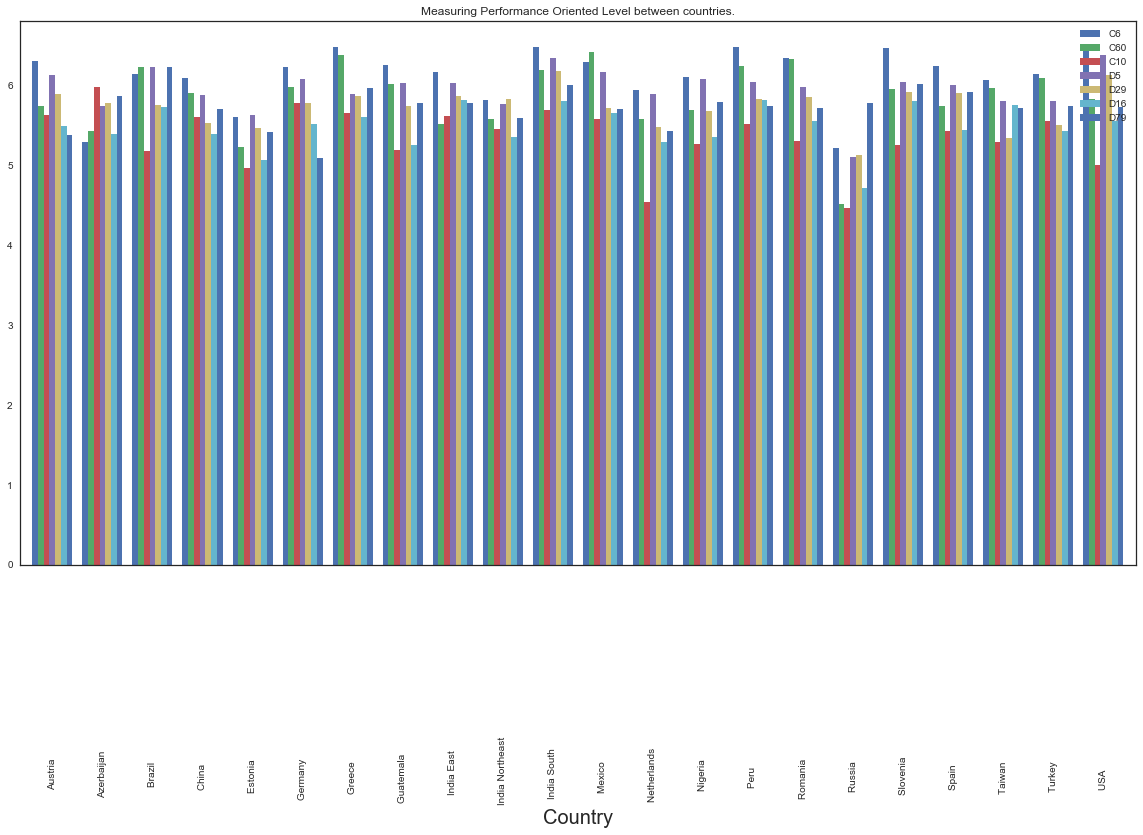

In [304]:
# PerformanceOrientedLevel
PerformanceOrientedLevel_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C6', 'C60', 'C10']]
PerformanceOrientedLevel_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D5', 'D29', 'D16', 'D79']]
PerformanceOrientedLevel_D.rename(columns={"couname":"Couname"},inplace=True)
PerformanceOrientedLevel = pd.merge(PerformanceOrientedLevel_C, PerformanceOrientedLevel_D).set_index(
    "Couname").plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Performance Oriented Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

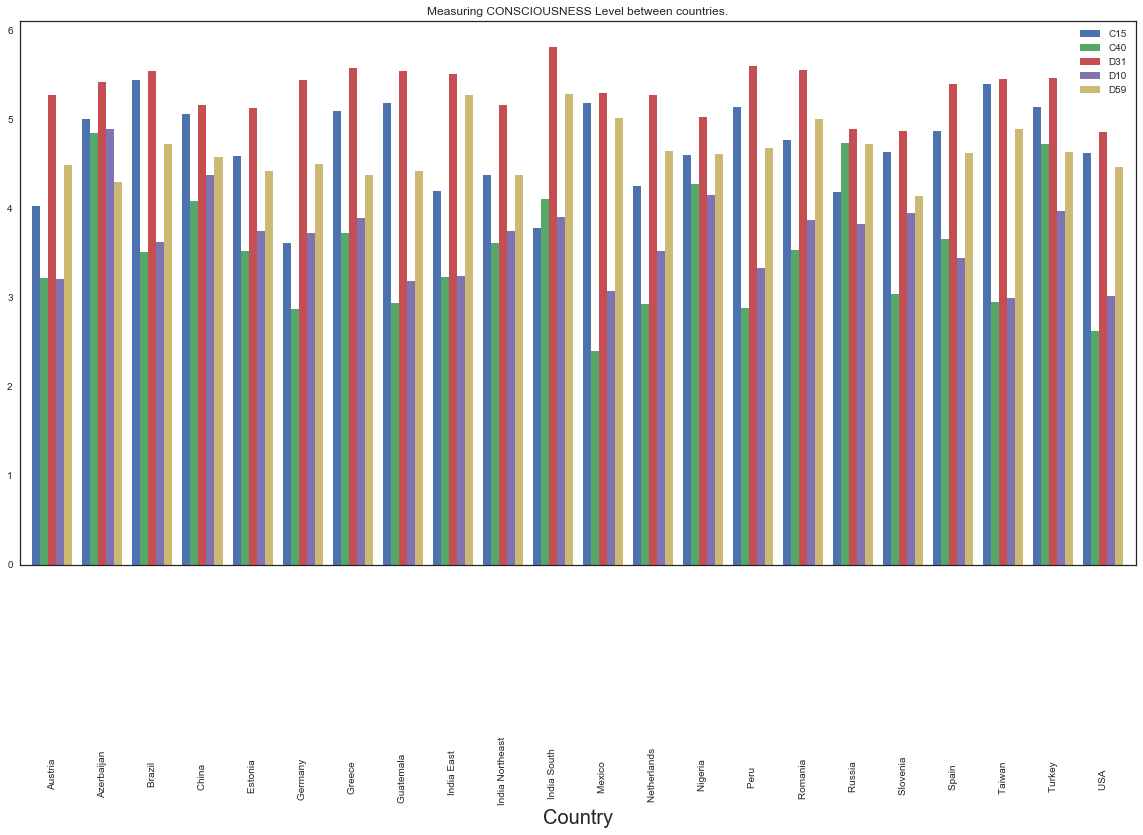

In [305]:
# CONSCIOUSNESS
CONSCIOUSNESS_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C15', 'C40']]
CONSCIOUSNESS_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D31', 'D10', 'D59']]
CONSCIOUSNESS_D.rename(columns={"couname":"Couname"},inplace=True)
CONSCIOUSNESS = pd.merge(CONSCIOUSNESS_C, CONSCIOUSNESS_D).set_index(
    "Couname").plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring CONSCIOUSNESS Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

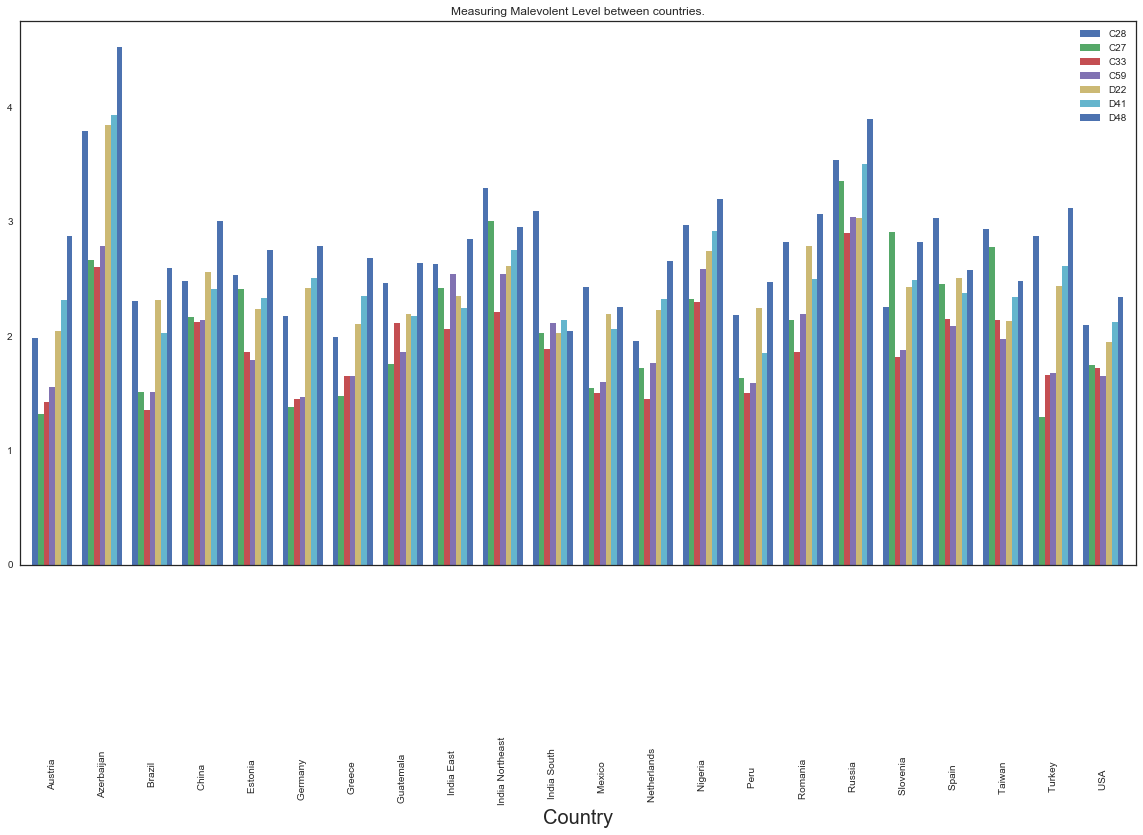

In [310]:
# Malevolent
Malevolent_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C28', 'C27', 'C33', 'C59']]
Malevolent_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D22', 'D41', 'D48']]
Malevolent_D.rename(columns={"couname":"Couname"},inplace=True)
Malevolent = pd.merge(Malevolent_C, Malevolent_D).set_index(
    "Couname").plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Malevolent Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

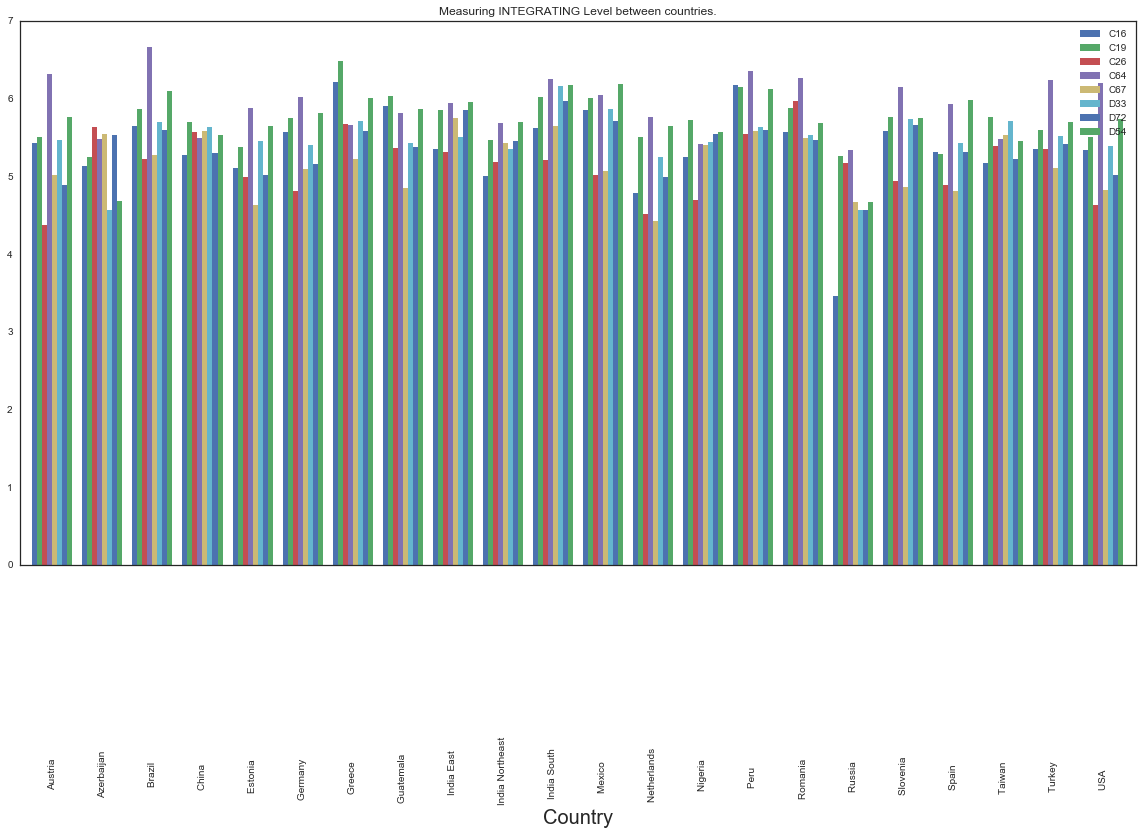

In [308]:
# INTEGRATING
INTEGRATING_C = C_Grouped_Country_Avg.reset_index()[['Couname', 'C16', 'C19', 'C26', 'C64', 'C67']]
INTEGRATING_D = D_Grouped_Country_Avg.reset_index()[['couname', 'D33', 'D72', 'D54']]
INTEGRATING_D.rename(columns={"couname":"Couname"},inplace=True)
INTEGRATING = pd.merge(INTEGRATING_C, INTEGRATING_D).set_index(
    "Couname").plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring INTEGRATING Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)

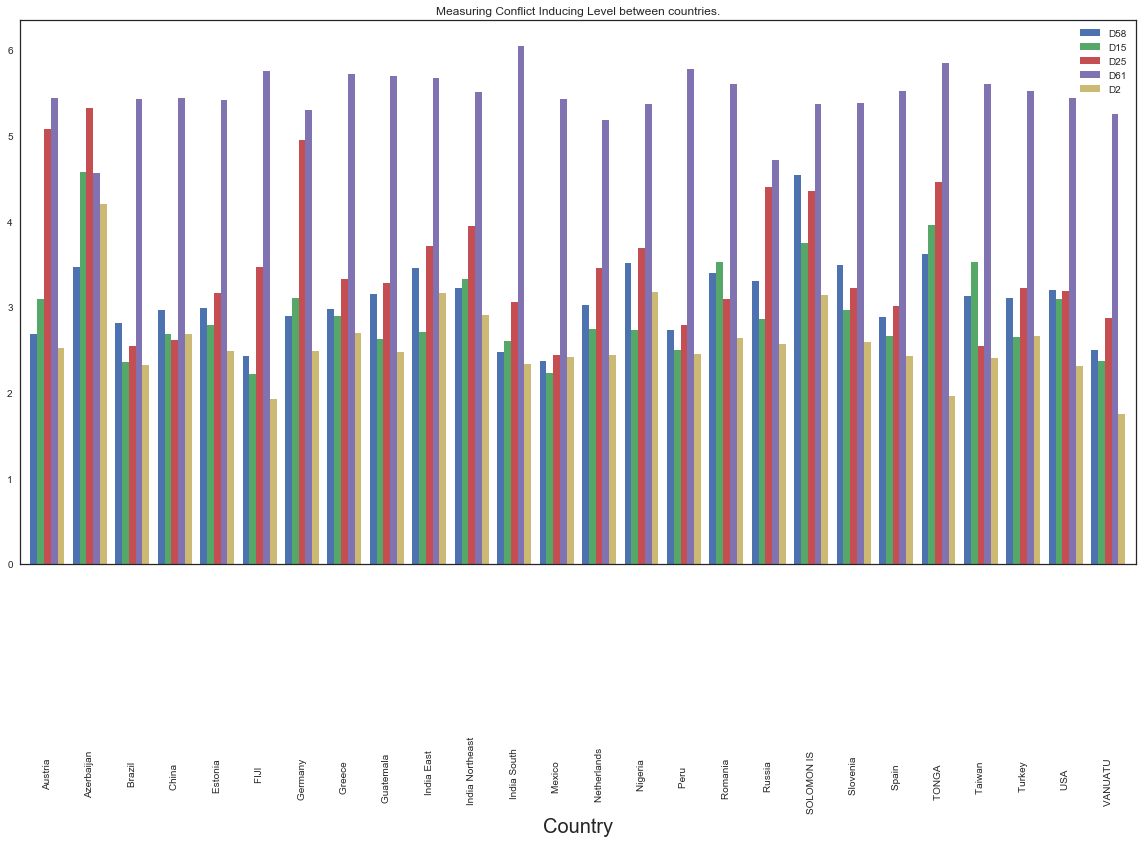

In [319]:
# ConflictInducing
ConflictInducing = D_Grouped_Country_Avg.reset_index()[['couname', 'D58', 'D15', 'D25', 'D61', 'D2']]
ConflictInducing.set_index("couname", inplace=True)
ConflictInducing.plot.bar(width=0.8)
plt.xlabel("Country", size=20)
plt.title("Measuring Conflict Inducing Level between countries.")
plt.margins(x=0)
fig = plt.gcf()
fig.set_size_inches(20, 10)


In [ ]:
# STOPPED AT COMMITMENT LEVEL on page 6/9